In [20]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = iris['target']

setosa_or_versicolor = (y==0)|(y==1)
X=X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_cif = SVC(kernel='linear')
svm_cif.fit(X,y)

SVC(kernel='linear')

(0.0, 5.5, 0.0, 2.0)

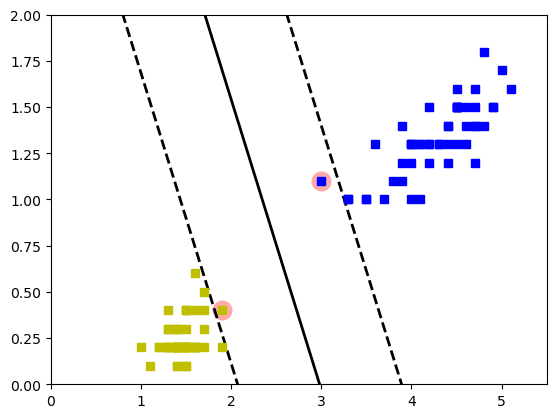

In [21]:
def plot_svc(svm_cif, xmin, xmax, sv=True):
    w = svm_cif.coef_[0]
    b = svm_cif.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1]*x0-b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_cif.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180, facecolors = '#FFAAAA')
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)

plot_svc(svm_cif, 0, 5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0], 'ys')
plt.axis([0,5.5,0,2])